# Giving perturbation at p array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import cauchy

In [2]:
Quantile_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - (N + 1))/(N+1)) + x for i in range(1,N+1)])
Quantile_Normal = lambda mu,sigma,N : np.array([mu +sigma*(2**0.5)*erfinv((2*i - N - 1)/(N+1)) for i in range(1,N+1)])

In [56]:
def normalization(arr):
    min_, max_ = np.min(arr),np.max(arr)
    N_arr = (arr-min_)/(max_-min_)
    return N_arr

def normalization_del(arr):
    min_, max_ = np.min(arr),np.max(arr)
    N_arr = (arr-min_)/(max_-min_)
    min_idx,max_idx = np.argmin(arr), np.argmax(arr)
    Nd_arr = np.delete(arr,(min_idx,max_idx))
    return Nd_arr

def Noise_grow(N,Noise,length):
    arr = np.arange(1,N+1)/(N+1)
    Noise_ = []
    Noise_.append(arr)
    for i in range(length):
        arr = arr + (1/(N+1))*(Noise) * (np.random.rand(N)-0.5)
        Noise_.append(arr)
    N_Noise = normalization(np.array(Noise_))
    return N_Noise
    

In [35]:
Q_L = lambda mu,d,p: d*np.tan(np.pi/2 * (2*p - 1)) + mu
Q_L_ALL = lambda mu,d,N:Q_L(mu,d,np.random.rand(N))

In [5]:
N = 2500
eps = (1/(N+1))*(1/1000)

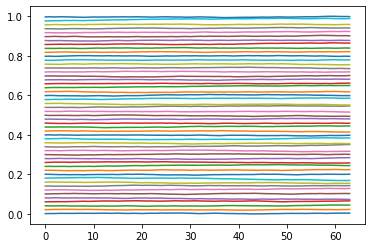

In [57]:
plt.plot(Noise_grow(51,0.1,63));

In [58]:
Rand_P = lambda N,noise: np.arange(1,N+1)/(N+1) + (1/(N+1))*(noise) * (np.random.rand(N)-0.5)
Normal_P = lambda N,dinv: np.arange(1,N+1)/(N+1) 
Rand_P_NEW = lambda N,noise: normalization_del(Rand_P(N+2,noise))
Rand_P_Sort = lambda N,noise: np.sort(normalization(Rand_P(N+2,noise)))[1:-1]

In [59]:
N = 2500
O =np.array([(Q_L(0,1,Rand_P_Sort(N,1))) for _ in range(63)])
A =np.array([(Q_L(0,1,Rand_P_Sort(N,20))) for _ in range(63)])
B =np.array([(Q_L(0,1,Rand_P_Sort(N,30))) for _ in range(63)])
C =np.array([(Q_L(0,1,Rand_P_Sort(N,50))) for _ in range(63)])
D =np.array([(Q_L(0,1,Rand_P_Sort(N,100))) for _ in range(63)])
E =np.array([(Q_L(0,1,Rand_P_Sort(N,200))) for _ in range(63)])
F =np.array([np.sort(Q_L(0,1,np.random.rand(N))) for _ in range(63)])

In [61]:
N = 500
O =np.array([Q_L(0,1,P) for P in Noise_grow(N,1,63)])
A =np.array([Q_L(0,1,P) for P in Noise_grow(N,2,63)])
B =np.array([Q_L(0,1,P) for P in Noise_grow(N,3,63)])
C =np.array([Q_L(0,1,P) for P in Noise_grow(N,5,63)])
D =np.array([Q_L(0,1,P) for P in Noise_grow(N,10,63)])
E =np.array([Q_L(0,1,P) for P in Noise_grow(N,20,63)])
F =np.array([np.sort(Q_L(0,1,np.random.rand(N))) for _ in range(63)])

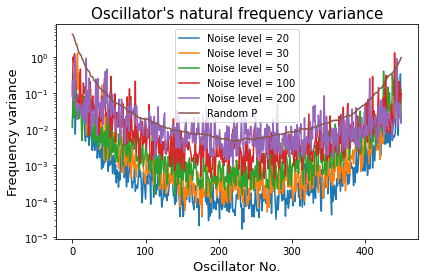

In [64]:
# plt.plot(np.var(O,axis=0)[:],'-d',markersize=3)

plt.plot(np.var(A,axis=0)[20:-30],'-',markersize=2,label="Noise level = 20")
plt.plot(np.var(B,axis=0)[20:-30],'-',markersize=2,label="Noise level = 30")
plt.plot(np.var(C,axis=0)[20:-30],'-',markersize=2,label="Noise level = 50")
plt.plot(np.var(D,axis=0)[20:-30],'-',markersize=2,label="Noise level = 100")
plt.plot(np.var(E,axis=0)[20:-30],'-',markersize=2,label="Noise level = 200")
plt.plot(np.var(F,axis=0)[20:-30],'-',markersize=2,label="Random P")
plt.legend()
plt.yscale('log')
plt.xlabel("Oscillator No.",fontsize=13)
plt.ylabel("Frequency variance",fontsize=13)
plt.title("Oscillator's natural frequency variance",fontsize=15)
plt.tight_layout()
# plt.savefig('Review2/Scenario 2-3 Oscillator\'s natural frequency variance.png',dpi=400)
# plt.plot(np.var(A,axis=0)[:-10])

In [97]:
int_ =np.linspace(0.05,0.95,500)
color = plt.cm.hsv(int_)

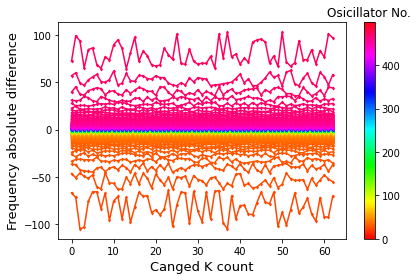

In [102]:
for i,temp  in enumerate(O.T):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


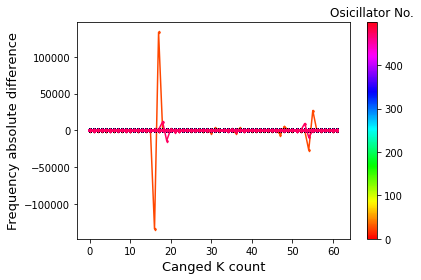

In [98]:
for i,temp  in enumerate((np.diff(A,axis=0).T[::])):
    plt.plot(temp,'-d',color=color[i],markersize=2)

Temp = plt.scatter(np.zeros(N),np.zeros(N),c=np.arange(0,N),s=0)
# plt.yscale('log')
plt.xlabel("Canged K count",fontsize=13)
plt.ylabel("Frequency absolute difference",fontsize=13)
# plt.title("Oscillator's frequency variation from mena",fontsize=15)
plt.hsv()
clb = plt.colorbar(Temp)
clb.ax.set_title('Osicillator No.')
plt.tight_layout()

# plt.savefig('Review2/Oscillator\'s natural frequency log diff.png',dpi=400)


In [ ]:
np.diff([Q_L(0,1,Rand_P(500,10)) for _ in range(100)])

array([[85.3746142 , 24.63817055, 13.96816184, ..., 13.70345643,
        26.418613  , 84.31306913],
       [77.63853418, 25.83044665, 12.46945299, ..., 12.72619571,
        26.19984741, 84.25846769],
       [79.81131275, 26.58041563, 12.31934949, ..., 13.04500975,
        26.33330896, 85.23875504],
       ...,
       [80.62888715, 27.62263844, 12.28622047, ..., 13.00202086,
        28.0860103 , 76.02651866],
       [72.32027432, 27.69370643, 13.14675058, ..., 14.10390101,
        24.00145796, 80.05027027],
       [84.44653765, 27.3400048 , 13.44906021, ..., 12.3613485 ,
        27.22287401, 77.58138531]])

In [ ]:
np.diff([Q_L(0,1,Rand_P(5,10)) for _ in range(100)],axis=0).shape

(99, 5)

# Scenario 2
Change P and control
>> oscillator에 주는 변화를 조절할 수 있다고 봄


In [ ]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
from TO_sim.To_Draw import *
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

In [ ]:
def normalization(arr):
    min_, max_ = np.min(arr),np.max(arr)
    N_arr = (arr-min_)/(max_-min_)
    return N_arr

def normalization_del(arr):
    min_, max_ = np.min(arr),np.max(arr)
    N_arr = (arr-min_)/(max_-min_)
    min_idx,max_idx = np.argmin(arr), np.argmax(arr)
    Nd_arr = np.delete(arr,(min_idx,max_idx))
    return Nd_arr

def Noise_grow(N,Noise,length):
    arr = np.arange(1,N+1)/(N+1)
    Noise_ = []
    Noise_.append(arr)
    for i in range(length):
        arr = arr + (1/(N+1))*(Noise) * (np.random.rand(N)-0.5)
        Noise_.append(arr)
    N_Noise = normalization(np.array(Noise_))
    return N_Noise
    
Q_L = lambda mu,d,p: d*np.tan(np.pi/2 * (2*p - 1)) + mu
Q_L_ALL = lambda mu,d,N:Q_L(mu,d,np.random.rand(N))
Rand_P = lambda N,noise: np.arange(1,N+1)/(N+1) + (1/(N+1))*(noise) * (np.random.rand(N)-0.5)
Normal_P = lambda N,dinv: np.arange(1,N+1)/(N+1) 
Rand_P_NEW = lambda N,noise: normalization_del(Rand_P(N+2,noise))
Rand_P_Sort = lambda N,noise: np.sort(normalization(Rand_P(N+2,noise)))[1:-1]


def Make_Omega(p_method,N,Noise):
    if p_method == 'Sorted random':
        return np.sort(Q_L_ALL(0,1,N))
    elif p_method == 'Random':
        return Q_L_ALL(0,1,N)
    elif p_method == 'Normalize sorted perturbation':
        return Q_L(0,1,Rand_P_Sort(N,Noise))
    elif p_method == 'Normalize perturbation':
        return Q_L(0,1,Rand_P_NEW(N,Noise))
    elif p_method == 'Perturbation':
        return np.sort(Q_L(0,1,Rand_P(N,Noise)))
    elif p_method == 'Sorted perturbation':
        return Q_L(0,1,Rand_P(N,Noise))
        
            
    
    

def Sim_Multi_m(m,Noise,p_method="Normalize sorted perturbation"):

    N  =  500
    K_start = 0.1
    K_end = 12.5
    dK = 0.2
    Ks = np.arange(K_start,K_end + dK,dK)
    # m = 0.95
    dtheta_init = np.zeros(N)
    t_end = 1000
    Noise_inv = (1/Noise)
    dt = 0.1
    dist = "Quantile Lorentzian" 
    if dist == "Normal":
        theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
    elif dist == "Lorentzian":
        theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    elif dist == "Quantile Lorentzian":
        theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
        
    theta_dic = {}
    dtheta_dic = {}
    rs_dic = {}
    omega_dic = {}
    t_dic = {}

    num = 0
    for K in tqdm(Ks):
        if num == 0:
            omega =  Make_Omega(p_method,N,Noise)
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
        else:
            omega =  Make_Omega(p_method,N,Noise)
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],
                                                        p_omega=omega,distribution="Normal")
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
        theta_dic[num] = theta_s
        dtheta_dic[num] = dtheta_s
        rs_dic[num] = rs
        omega_dic[num] = omega
        t_dic[num] = t + num*t_end
        num += 1
    theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

    theta_r_dic = {}
    dtheta_r_dic = {}
    rs_r_dic = {}
    omega_r_dic = {}
    t_r_dic = {}
    dKr = -0.2
    Ksr = np.arange(K_end,K_start + dKr,dKr)

    num_r = 0
    for K in tqdm(Ksr):
        if num_r == 0:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
        else:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                        p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
        theta_r_dic[num_r] = theta_s
        dtheta_r_dic[num_r] = dtheta_s
        rs_r_dic[num_r] = rs
        omega_r_dic[num_r] = omega
        t_r_dic[num_r] = t + num_r*t_end
        num_r += 1
        
        
    createFolder(f"Review2/Control_P/{p_method}/Noise = {Noise}")
    Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name=f"Review2/Control_P/{p_method}/Noise = {Noise}")


In [90]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.To_Draw import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
Rand_P = lambda N,dinv: np.arange(1,N+1)/(N+1) + (1/(N+1))*(1/dinv) * (np.random.rand(N)-0.5)
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory.' + directory)

In [ ]:
# for Noise in [2,20,30]:
for m in [6]:
    N  =  500
    K_start = 0.1
    K_end = 12.5
    dK = 0.2
    Ks = np.arange(K_start,K_end + dK,dK)
    # m = 0.95
    dtheta_init = np.zeros(N)
    t_end = 1000
    Noise = 20
    dt = 0.1
    dist = "Quantile Lorentzian" 
    if dist == "Normal":
        theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
    elif dist == "Lorentzian":
        theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    elif dist == "Quantile Lorentzian":
        theta_init,omega_init, Kc = Quantile_Lorentzian(N,0,1,seed=0)
        
    theta_dic = {}
    dtheta_dic = {}
    rs_dic = {}
    omega_dic = {}
    t_dic = {}

    num = 0
    for K in tqdm(Ks):
        if num == 0:
            omega =  np.sort(Q_L(0,1,Rand_P(N,Noise)))
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega,distribution="Normal")
        else:
            omega =  np.sort(Q_L(0,1,Rand_P(N,Noise)))
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],
                                                        p_omega=omega,distribution="Normal")
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
        theta_dic[num] = theta_s
        dtheta_dic[num] = dtheta_s
        rs_dic[num] = rs
        omega_dic[num] = omega
        t_dic[num] = t + num*t_end
        num += 1
    theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

    theta_r_dic = {}
    dtheta_r_dic = {}
    rs_r_dic = {}
    omega_r_dic = {}
    t_r_dic = {}
    dKr = -0.2
    Ksr = np.arange(K_end,K_start + dKr,dKr)

    num_r = 0
    for K in tqdm(Ksr):
        if num_r == 0:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
        else:
            theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],
                                                        p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
            # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
        theta_r_dic[num_r] = theta_s
        dtheta_r_dic[num_r] = dtheta_s
        rs_r_dic[num_r] = rs
        omega_r_dic[num_r] = omega
        t_r_dic[num_r] = t + num_r*t_end
        num_r += 1
        
        
    createFolder(f"Review2/Control_P/Sorted/Noise = {Noise}")
    Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,mean_time=50,save=True,Folder_name=f"Review2/Control_P/Sorted/Noise = {Noise}")


# Multiprocess

In [1]:
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise,Sim_Multi_mset_NOT_TQDM
import parmap

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

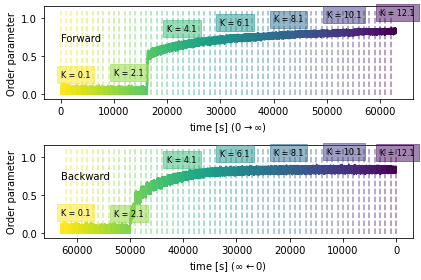

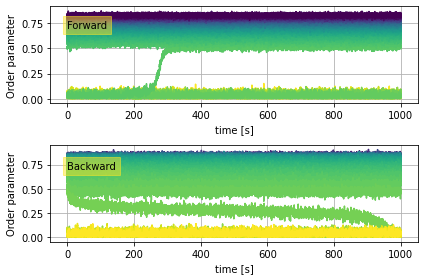

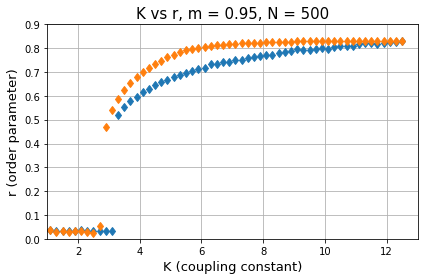

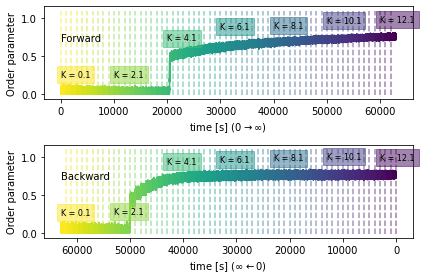

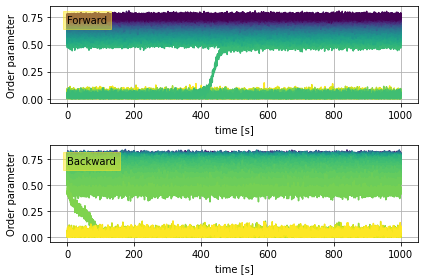

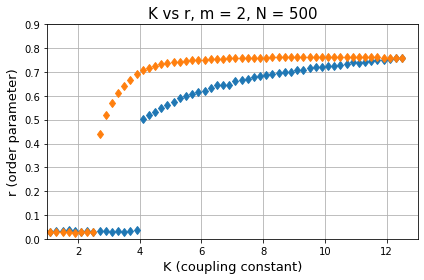

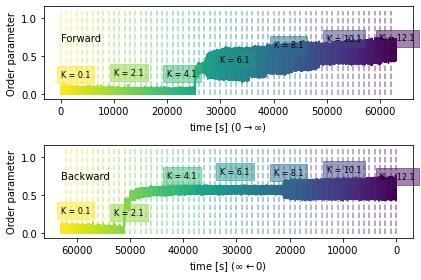

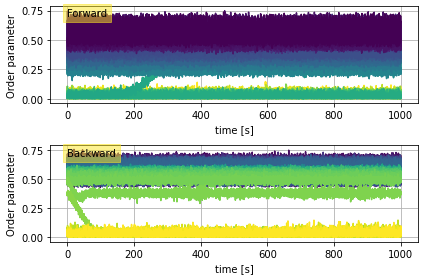

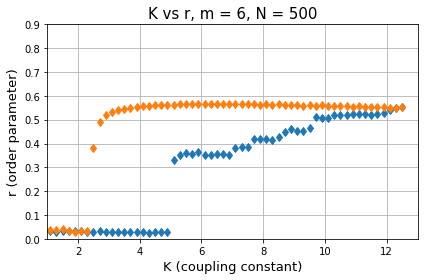

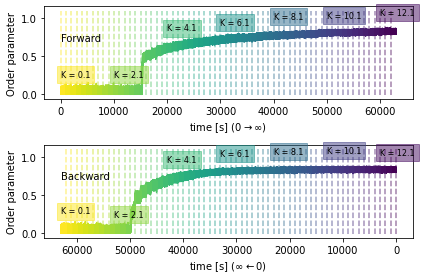

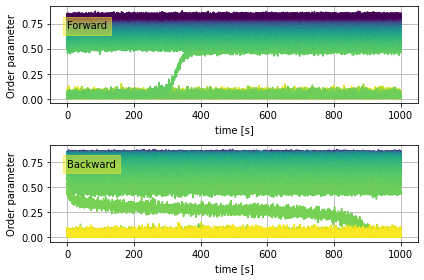

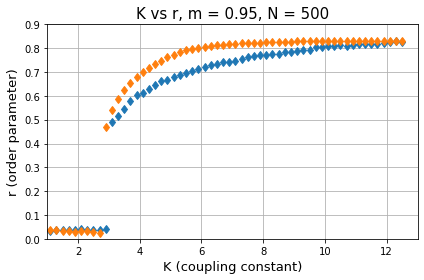

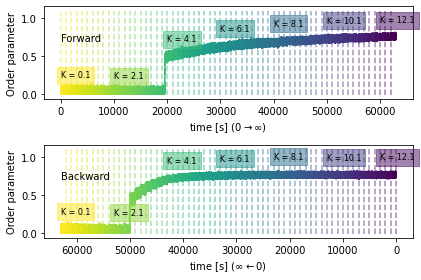

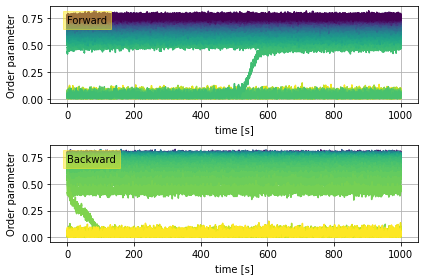

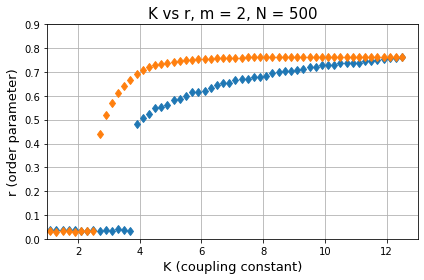

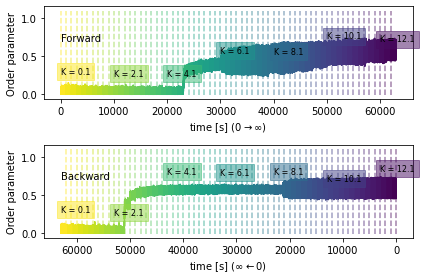

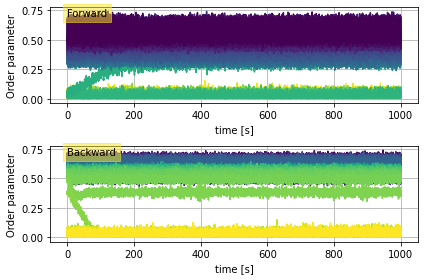

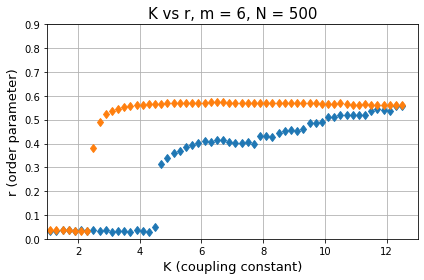

In [2]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise
import parmap
for Noise in [1,2]:
    Sim_Multi_mset(Noise)